
**EDA**


In [466]:
import pandas as pd
import numpy as np
import mitosheet
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datetime

EDA GOALS:
- Calculate the total number of customers in each section. +
- Calculate the total number of customers in each section over time. +
- Display the number of customers at checkout over time. +
- Calculate the time each customer spent in the market.
- Calculate the total number of customers in the supermarket over time.
- Our business managers think that the first section customers visit follows a different pattern than the following ones. 
- Plot the distribution of customers of their first visited section versus following sections.
- Estimate the total revenue for a customer (section, revenue per minute)

In [467]:
# Imported monday.csv
monday = pd.read_csv(r'/Users/mac/Desktop/localrepo_project8/Project-Nikita-Jesus/data/monday.csv', sep=';')
# Imported tuesday.csv
tuesday = pd.read_csv(r'/Users/mac/Desktop/localrepo_project8/Project-Nikita-Jesus/data/tuesday.csv', sep=';')
# Imported wednesday.csv
wednesday = pd.read_csv(r'/Users/mac/Desktop/localrepo_project8/Project-Nikita-Jesus/data/wednesday.csv', sep=';')
# Imported thursday.csv
thursday = pd.read_csv(r'/Users/mac/Desktop/localrepo_project8/Project-Nikita-Jesus/data/thursday.csv', sep=';')
# Imported friday.csv
friday = pd.read_csv(r'/Users/mac/Desktop/localrepo_project8/Project-Nikita-Jesus/data/friday.csv', sep=';')
    
# Changed timestamp to dtype datetime
monday['customer_no']=monday['customer_no'].apply(lambda x: str(x)+'_monday')
# Changed timestamp to dtype datetime
tuesday['customer_no']=tuesday['customer_no'].apply(lambda x: str(x)+'_tuesday')
# Changed timestamp to dtype datetime
wednesday['customer_no']=wednesday['customer_no'].apply(lambda x: str(x)+'_wednesday')
# Changed timestamp to dtype datetime
thursday['customer_no']=thursday['customer_no'].apply(lambda x: str(x)+'_thursday')
# Changed timestamp to dtype datetime
#friday['customer_no'] = friday['customer_no']+8000
#friday['customer_no'] = friday['customer_no'].astype(str)
friday['customer_no']=friday['customer_no'].apply(lambda x: str(x)+'_friday')
# Concatenated 5 into dataframes into df
df = pd.concat([monday, tuesday, wednesday, thursday, friday], join='inner', ignore_index=True)


#datetime_series = pd.to_datetime(df['timestamp'])
#datetime_index = pd.DatetimeIndex(datetime_series.values)
#df=df.set_index(datetime_index)
#df.drop('timestamp',axis=1,inplace=True)

df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df["time"] = df["timestamp"].dt.time
df.set_index("timestamp",inplace=True)

In [468]:
df

,customer_no,location,hour,time
timestamp,,,,
2019-09-02 07:03:00,1_monday,dairy,7,07:03:00
2019-09-02 07:03:00,2_monday,dairy,7,07:03:00
2019-09-02 07:04:00,3_monday,dairy,7,07:04:00
2019-09-02 07:04:00,4_monday,dairy,7,07:04:00
2019-09-02 07:04:00,5_monday,spices,7,07:04:00
...,...,...,...,...
2019-09-06 21:50:00,1500_friday,dairy,21,21:50:00
2019-09-06 21:50:00,1507_friday,checkout,21,21:50:00
2019-09-06 21:50:00,1508_friday,checkout,21,21:50:00


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  24877 non-null  object
 1   location     24877 non-null  object
 2   hour         24877 non-null  int64 
 3   time         24877 non-null  object
dtypes: int64(1), object(3)
memory usage: 971.8+ KB


In [470]:
df

,customer_no,location,hour,time
timestamp,,,,
2019-09-02 07:03:00,1_monday,dairy,7,07:03:00
2019-09-02 07:03:00,2_monday,dairy,7,07:03:00
2019-09-02 07:04:00,3_monday,dairy,7,07:04:00
2019-09-02 07:04:00,4_monday,dairy,7,07:04:00
2019-09-02 07:04:00,5_monday,spices,7,07:04:00
...,...,...,...,...
2019-09-06 21:50:00,1500_friday,dairy,21,21:50:00
2019-09-06 21:50:00,1507_friday,checkout,21,21:50:00
2019-09-06 21:50:00,1508_friday,checkout,21,21:50:00


In [471]:
#missing customers from checkout
checkout=set(df[df['location']=='checkout']['customer_no'].unique())
all_customers=set(df['customer_no'].unique())
difference=all_customers.difference(checkout)
for customers in difference:
    df=df.append({'timestamp':'2019-09-02 22:00:00','customer_no':customers,'location':'checkout'}, ignore_index=True)
df[df['timestamp']=='2019-09-02 22:00:00']


,customer_no,location,hour,time,timestamp
24877,1437_monday,checkout,NaN,NaN,2019-09-02 22:00:00
24878,1430_monday,checkout,NaN,NaN,2019-09-02 22:00:00
24879,1433_monday,checkout,NaN,NaN,2019-09-02 22:00:00
24880,1506_friday,checkout,NaN,NaN,2019-09-02 22:00:00
24881,1422_tuesday,checkout,NaN,NaN,2019-09-02 22:00:00
...,...,...,...,...,...
24900,1532_thursday,checkout,NaN,NaN,2019-09-02 22:00:00
24901,1440_monday,checkout,NaN,NaN,2019-09-02 22:00:00
24902,1533_thursday,checkout,NaN,NaN,2019-09-02 22:00:00
24903,1411_tuesday,checkout,NaN,NaN,2019-09-02 22:00:00


Text(0.5, 1.0, 'Customer distribution by location')

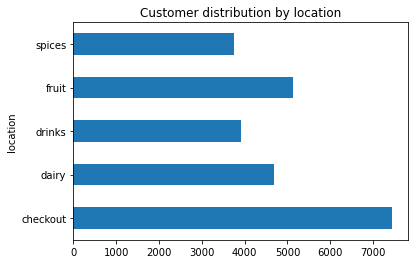

In [472]:
#barplot - Customer distribution by location

df.groupby(['location'])['customer_no'].count().plot.barh()
plt.title('Customer distribution by location')


Text(0.5, 1.0, '% of customers per section')

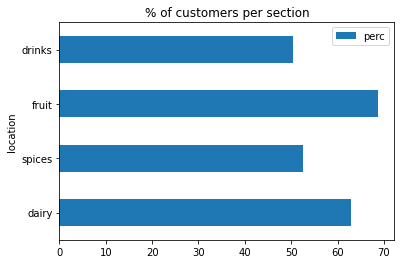

In [477]:
#barplot - Percentage of customers per section
cust_per_aile=df[df['location']!='checkout'].groupby(['location'])['customer_no'].count()
cust_total=df[df['location']=='checkout'].groupby(['location'])['customer_no'].count()
perc_cust=pd.to_numeric(cust_per_aile.values)/pd.to_numeric(cust_total.values)*100
p=pd.concat([pd.DataFrame(perc_cust),pd.DataFrame(pd.unique(df['location'][df['location']!='checkout']))], axis=1)
p.columns=['perc','location']
p.set_index("location", inplace=True)
p.plot.barh()
plt.title('% of customers per section')

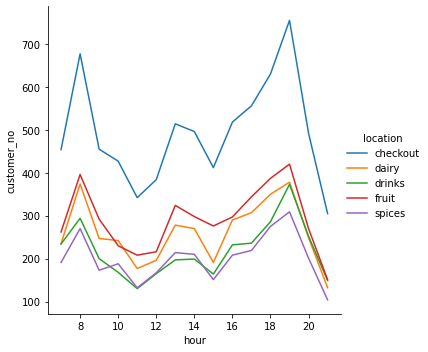

In [478]:
#barplot - number of customers in each section over time
total_customers_time = pd.DataFrame(df.groupby(["location","hour"])["customer_no"].nunique())
total_customers_time.reset_index(inplace=True)
sns.relplot(x="hour", y="customer_no", hue="location", kind="line", data=total_customers_time)

In [480]:
#Customer behavior at diffrent hours of the day
df[df['location']!="checkout"].groupby('location').resample("30T").nunique()['customer_no'].unstack().plot(legend=False)
plt.title("customer behavior at different hours of the day")

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
df.reset_index(inplace=True)
df[df['location']=="checkout"].groupby("location").resample("15T").nunique()['customer_no'].reset_index().set_index("timestamp").plot()
plt.title("Amount of people at the checkout in an 15mins interval")

In [ ]:
df['diff'] = df.sort_values(['customer_no','timestamp']).groupby('customer_no')['timestamp'].diff()
df[df['diff'].notnull()][['customer_no','diff']].groupby('diff').nunique()['customer_no'].reset_index().set_index('diff').plot.bar()
plt.tite('How much time do customers spend in the market?')

In [ ]:
# Amount spent by each customer
df[df["diff"].notnull()][["customer_no","diff"]]

In [ ]:
df.resample("15T").nunique()["customer_no"].plot()
plt.title("Total customer numbers inside the market over time")

In [ ]:
df["customer_no"].nunique()
#1535 unique customers = max. nr of customers in a day

In [455]:
df = pd.get_dummies(df, columns=['location'])
df['location_checkout'].sum()
df['location_dairy'].sum()
df['location_drinks'].sum()
df['location_fruit'].sum()
df['location_spices'].sum()

3754

In [456]:
# #missing customers from checkout
# checkout=set(data[data["location"]=="checkout"]["customer_no"].unique())
# all_c=set(data["customer_no"].unique())
# diff=all_c.difference(checkout)
# for cust in diff:
#                data=data.append({"timestamp":"2019-09-02 22:00:00","customer_no":'cust', 'location':"checkout"}, ignore_index=True)
#      data[data["timestamp"]=="2019-09-02 22:00:00"]

In [457]:
# df = pd.DataFrame()
#days = ['friday', 'thursday', 'wednesday', 'tuesday', 'monday']
# for day in days:
#     df = pd.concat([pd.read_csv(f'data/{day}.csv', sep=';'), df])